# Multiple Linear Regression

### Introduction

Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable. 

### Assumptions of Multiple Linear Regression

Multiple linear regression makes all of the same assumptions as simple linear regression:

    Homogeneity of variance (homoscedasticity): 
    the size of the error in our prediction doesn’t change significantly across the values of the independent variable.

    Independence of observations: 
    the observations in the dataset were collected using statistically valid methods, and there are no hidden relationships among variables.

    Normality: 
    The data follows a normal distribution.

    Linearity: 
    the line of best fit through the data points is a straight line, rather than a curve or some sort of grouping factor.

In multiple linear regression, it is possible that some of the independent variables are actually correlated with one another, so it is important to check these before developing the regression model. If two independent variables are too highly correlated (r2 > ~0.6), then only one of them should be used in the regression model.

    
Multiple Linear Regression equation is:

$$ y = b_{0} + b_{1}*x_{1} + b_{2}*x_{2} + .... + b_{n}*x_{n} + e $$
    
   1. y is the predicted value of the dependent variable (y) for any given value of the independent variable (x).
   2. $b_{0}$ is the intercept, the predicted value of y when the x is 0.
   3. $b_{1}$ is the regression coefficient – how much we expect y to change as x increases.
   4. x is the independent variable ( the variable we expect is influencing y).
   5. e is the error of the estimate, or how much variation there is in our estimate of the regression coefficient.

To find the best-fit line for each independent variable, multiple linear regression calculates three things:

1. The regression coefficients that lead to the smallest overall model error.
2. The t-statistic of the overall model.
3. The associated p-value (how likely it is that the t-statistic would have occurred by chance if the null hypothesis of no relationship between the independent and dependent variables was true).

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

## Importing the dataset

In [2]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [3]:
print(dataset)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [4]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [5]:
print(Y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


## Encoding the categorical data

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encode', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [7]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Spliting dataset into Training and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [9]:
print(X_train)

[[0.0 1.0 0.0 55493.95 103057.49 214634.81]
 [0.0 0.0 1.0 46014.02 85047.44 205517.64]
 [0.0 1.0 0.0 75328.87 144135.98 134050.07]
 [1.0 0.0 0.0 46426.07 157693.92 210797.67]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 1000.23 124153.04 1903.93]
 [0.0 0.0 1.0 542.05 51743.15 0.0]
 [0.0 0.0 1.0 65605.48 153032.06 107138.38]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 1.0 0.0 61994.48 115641.28 91131.24]
 [1.0 0.0 0.0 63408.86 129219.61 46085.25]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [1.0 0.0 0.0 23640.93 96189.63 148001.11]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 15505.73 127382.3 35534.17]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 0.0 64664.71 139553.16 137962.62]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 0.0 0.0 28754.33 118546.05 172795.67]
 [1.

In [10]:
print(X_test)

[[0.0 1.0 0.0 66051.52 182645.56 118148.2]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [0.0 1.0 0.0 27892.92 84710.77 164470.71]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 72107.6 127864.55 353183.81]
 [0.0 0.0 1.0 20229.59 65947.93 185265.1]
 [0.0 0.0 1.0 61136.38 152701.92 88218.23]
 [0.0 1.0 0.0 73994.56 122782.75 303319.26]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]


In [11]:
print(Y_train)

[ 96778.92  96479.51 105733.54  96712.8  124266.9  155752.6  132602.65
  64926.08  35673.41 101004.64 129917.04  99937.59  97427.84 126992.93
  71498.49 118474.03  69758.98 152211.77 134307.35 107404.34 156991.12
 125370.37  78239.91  14681.4  191792.06 141585.52  89949.14 108552.04
 156122.51 108733.99  90708.19 111313.02 122776.86 149759.96  81005.76
  49490.75 182901.99 192261.83  42559.73  65200.33]


In [12]:
print(Y_test)

[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]


## Creating Multiple Regression Model and Training it on Training Set

To create our multiple regression model we are using the LinearRegression class of the linear_model module of the sklearn library.

    1. First we create the instance or object of our LinearRegression class which indeed is our model
    2. Now to train the model we connect it to our training data using fit method
    
Linear Regression class automatically understands that we are trying to make a Multiple Linear Regression model as the difference between linear regression model and multiple regression model is the number of features in feature matrix.

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

## Predicting the Test Set Result

To predict the test result we use the predict method on our trained model which requires test feature matrix and returns a predict vector consisiting of predicted value of target vector for test data.

We store the predict vector in a variable which is inded the prediction of the target vector based on test feature matrix supplied.

In [14]:
y_pred = regressor.predict(X_test)

Now to get the result only upto two decimal points we use the set_print options method with precison argument.

In [15]:
np.set_printoptions(precision=2)

Now we will concatenate the predicted value of target vector (y_pred) and test or real value of target vector (Y_test) using the concatenate method of the numpy.

Concatenate method of numpy takes a tuple containing the arrays to be merged and number of output column as argument.

With that we also apply reshape method on each arrays to make them vertical insted of horizontal for better analysis.

reshape method takes len of the column to be reshaped and number of output column as argument.


In [18]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


## Visualizing the Results

As their are many features in our feature matrix it is not possible to plot them all against the target vector as it will become multi dimensional.

But what we may visualize is the value of predicted target vector and value of test target vector which we have printed earilier.

Where red line shows the test value of target vector and green line shows the predicted value of target vector.

    Closer the lines to each other better the model is.

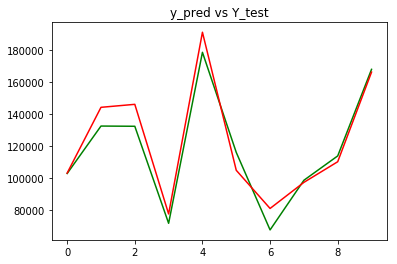

In [27]:
plt.plot(y_pred,'g-', Y_test,'r-')
plt.title('y_pred vs Y_test')
plt.show()